In [3]:
import sys
import os
sys.path.append(os.path.abspath("../.."))

from ml.models.VisionCNN import VisionCNN
from lightning.pytorch.tuner.tuning import Tuner
from lightning.pytorch import Trainer
from ml.data.PetalDataModule import PetalDataModule

/home/dlonghi1_jm/Projects/plant_emotion_classification/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dlonghi1_jm/Projects/plant_emotion_classification/venv/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [4]:
model = VisionCNN(
    pretrained_model_name='resnet18',
    n_output=6,
    freeze=False,
    lr=0.001
)

In [5]:

data_module = PetalDataModule()

In [15]:
trainer = Trainer(max_epochs=10)
tuner = Tuner(trainer)

/home/dlonghi1_jm/Projects/plant_emotion_classification/venv/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/dlonghi1_jm/Projects/plant_emotion_classificat ...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [16]:

lr_finder = tuner.lr_find(model, datamodule=data_module)

Failed to create or save snippet for recording: /home/dlonghi1_jm/.data/petal/post-labeled/unlabeled-audio/10_dreimasterblume_3mast_142hz_1738663599077.wav with following error: division by zero. Start of snippet: 12000. End of snippet: 20000
Failed to create or save snippet for recording: /home/dlonghi1_jm/.data/petal/post-labeled/unlabeled-audio/11_tim_basilikum_142hz_1738681653620.wav with following error: division by zero. Start of snippet: 12000. End of snippet: 20000
Loading recording: /home/dlonghi1_jm/.data/petal/post-labeled/unlabeled-audio/12_philipp_basilikum_142hz_1738682521686.wav failed with following error: [Errno 2] No such file or directory: 'ffprobe'
Failed to create or save snippet for recording: /home/dlonghi1_jm/.data/petal/post-labeled/unlabeled-audio/12_philipp_basilikum_142hz_1738682521686.wav with following error: division by zero. Start of snippet: 12000. End of snippet: 20000
Failed to create or save snippet for recording: /home/dlonghi1_jm/.data/petal/post-l

/home/dlonghi1_jm/Projects/plant_emotion_classification/venv/lib/python3.10/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)
/home/dlonghi1_jm/Projects/plant_emotion_classification/venv/lib/python3.10/site-packages/pydub/utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Failed to create or save snippet for recording: /home/dlonghi1_jm/.data/petal/post-labeled/unlabeled-audio/53_lars_basilikum_142hz_1739287676171.wav with following error: division by zero. Start of snippet: 12000. End of snippet: 20000
Failed to create or save snippet for recording: /home/dlonghi1_jm/.data/petal/post-labeled/unlabeled-audio/54_tobias_basilikum_142hz_1739439483828.wav with following error: division by zero. Start of snippet: 12000. End of snippet: 20000
Failed to create or save snippet for recording: /home/dlonghi1_jm/.data/petal/post-labeled/unlabeled-audio/55_maurice_basilikum_142hz_1739440790938.wav with following error: division by zero. Start of snippet: 12000. End of snippet: 20000
Failed to create or save snippet for recording: /home/dlonghi1_jm/.data/petal/post-labeled/unlabeled-audio/56_thomas_basilikum_142hz_1739441883001.wav with following error: division by zero. Start of snippet: 12000. End of snippet: 20000
Failed to create or save snippet for recording: /

/home/dlonghi1_jm/Projects/plant_emotion_classification/venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
/home/dlonghi1_jm/Projects/plant_emotion_classification/venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
Finding best initial lr: 100%|██████████| 100/100 [00:51<00:00,  1.94it/s]
Learning rate set to 0.0022908676527677745
Restoring states from the checkpoint path at /home/dlonghi1_jm/Projects/plant_emotion_classification/ml/notebooks/.lr_find_4349aa83-2244-4a2d-84ba-237de2330cf3.ckpt
Restored all st

0.0022908676527677745

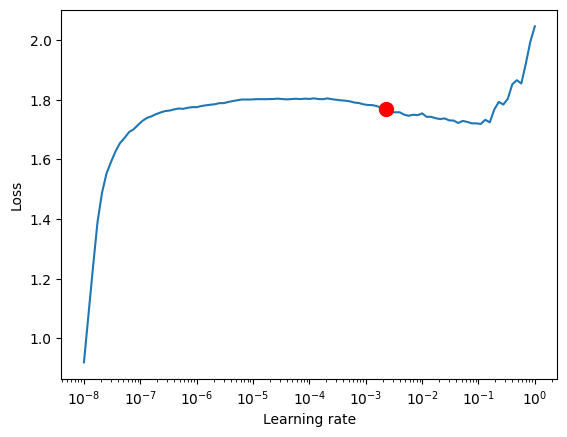

In [17]:
assert lr_finder is not None
fig = lr_finder.plot(suggest=True)
lr_finder.suggestion()